In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


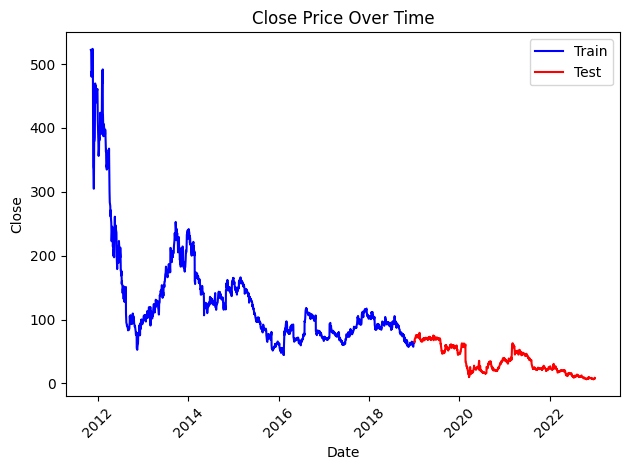

In [2]:
#GROUPON 
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('GRPN',start_date,end_date,2019)
data.data_preprocess()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 1.504225909418548 Average Fitness = 0.9790645209498374
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 1.504225909418548 Average Fitness = 1.0617337289148843
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 1.5509941344867644 Average Fitness = 1.1324220639282139
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 1.5509941344867644 Average Fitness = 1.1830385666946723
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 1.5509941344867644 Average Fitness = 1.2213886203524131
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 1.56202500222577 Average Fitness = 1.2157980925988943
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 1.6756710828084795 Average Fitness = 1.2523120576148408
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 1.6756710828084795 Average Fitness = 1.2803426063381984
GENERATION 7 END
GENERATION 8 START
Gene

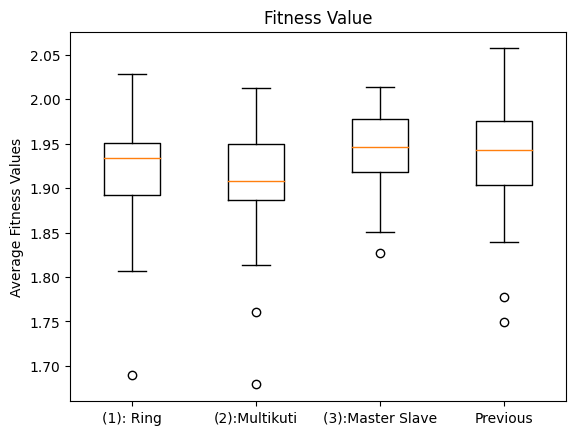

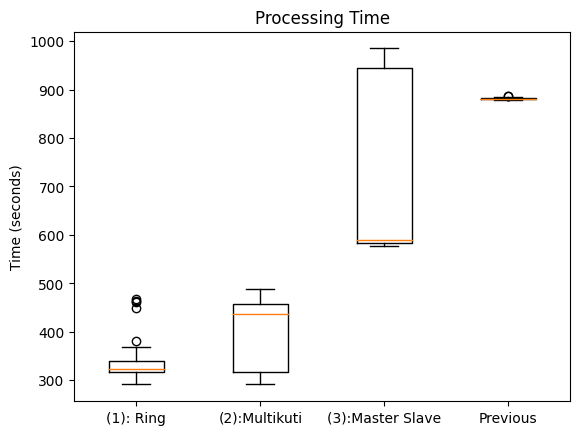

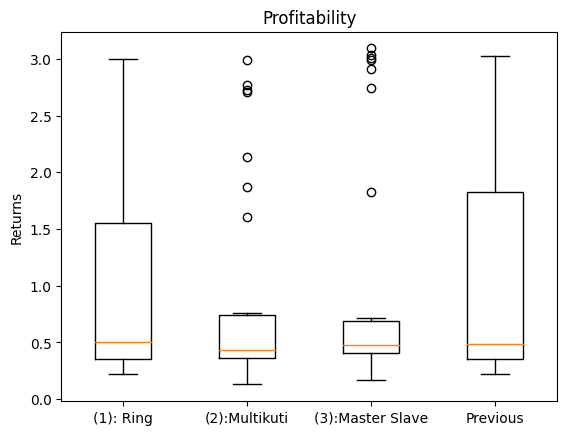

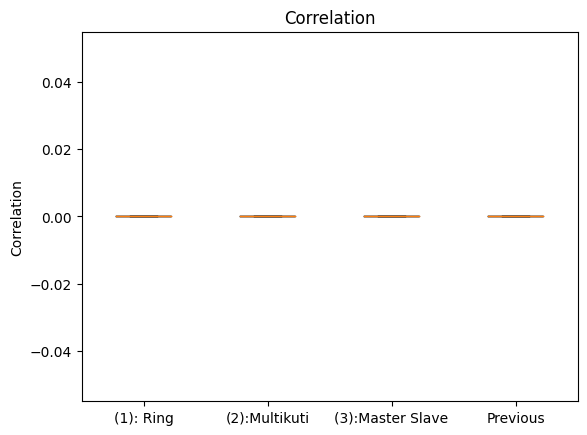

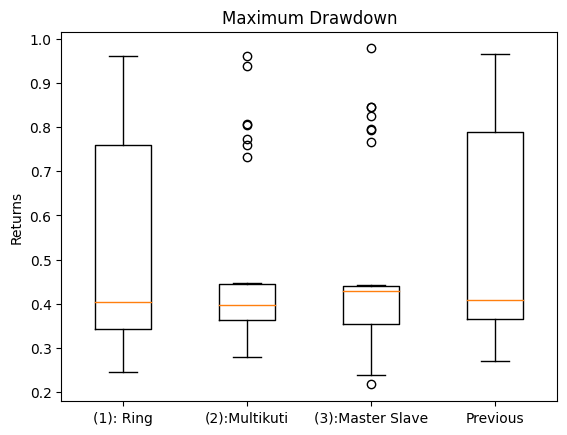

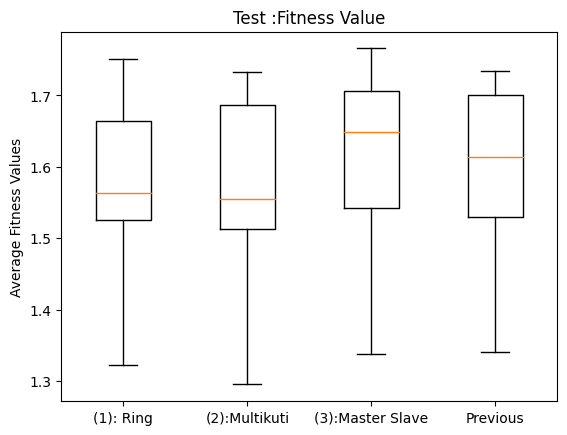

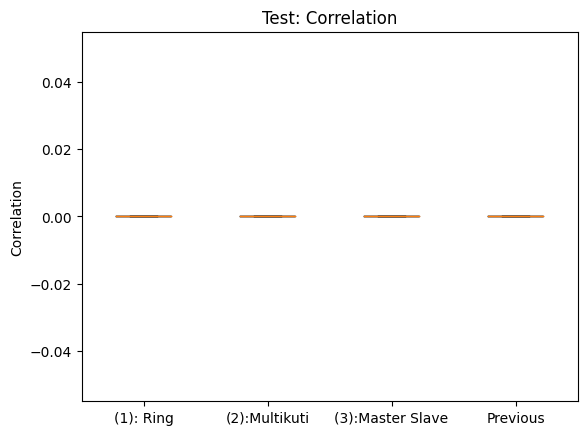

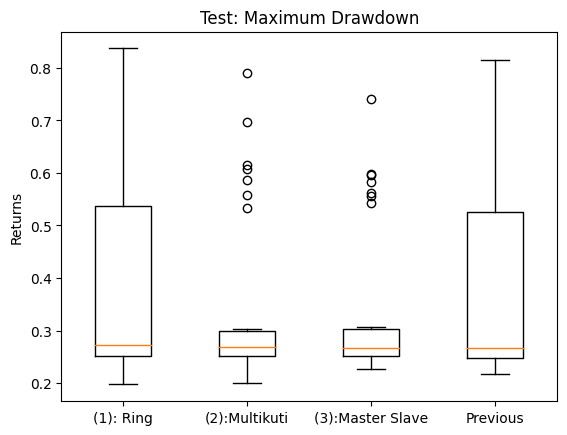

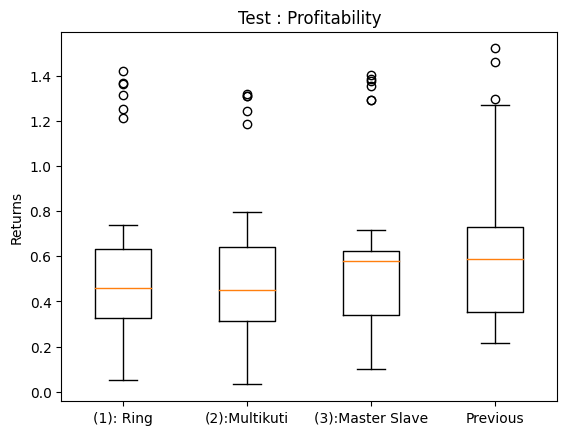

In [3]:
#total return training 
import matplotlib.pyplot as plt

fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
speed_values =  {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
risk = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_risk = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:
    for j in range(30):
        start = time.time()
        ga = IslandGGA(data=data.train_data,K=4,num_islands=8,m_iter=10,num_iter=50,pSize=120,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy=i)
        ga.evolve()
        end = time.time()
        processing_time=end - start
        speed_values[i].append(processing_time)
        ### USE TRAIN DATA? 
        fitness_values[i].append(ga.globalBest.fitness_value)
        profit[i].append(ga.globalBest.profit)
        risk[i].append(ga.globalBest.corr)
        mdd[i].append(ga.globalBest.mdd)
        ### USE TEST DATA HERE? 
        ga.globalBest.calculate_chromosome_fitness(data.test_data,1)
        test_fitness_values[i].append(ga.globalBest.fitness_value)
        test_profit[i].append(ga.globalBest.profit)
        test_risk[i].append(ga.globalBest.corr)
        test_mdd[i].append(ga.globalBest.mdd)



# Combine the fitness data into a list
fitness_data = [fitness_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Best Fitness Values')

# Set the title of the plot
ax.set_title('Fitness Value')

# Show the plot
plt.show()



#### TIME PLOT
# Combine the time data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a time box plot
fig, ax = plt.subplots()
ax.boxplot(speed_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()



#### profit
# Combine the profit data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a profit box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Profitability')

# Show the plot
plt.show()



#### risk
# Combine the risk data into a list
risk_data = [risk[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(risk_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Correlation')

# Set the title of the plot
ax.set_title('Correlation')

# Show the plot
plt.show()

#### mdd
# Combine the risk data into a list
mdd_data = [mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Maximum Drawdown')

# Show the plot
plt.show()


# Combine the test fitness data into a list
test_fitness_data = [test_fitness_values[i] for i in  evolve_strategy]
# Create a test fitness box plot
fig, ax = plt.subplots()
ax.boxplot(test_fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Average Fitness Values')

# Set the title of the plot
ax.set_title('Test :Fitness Value')
# Show the plot
plt.show()

#### test risk
# Combine the risk data into a list
test_risk_data = [test_risk[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_risk_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Correlation')

# Set the title of the plot
ax.set_title('Test: Correlation')

#### test mdd
# Combine the risk data into a list
test_mdd_data = [test_mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test: Maximum Drawdown')

#### profit
# Combine the profit data into a list
test_profit_data = [test_profit[i] for i in  evolve_strategy]

# Create a test profit box plot
fig, ax = plt.subplots()
ax.boxplot(test_profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test : Profitability')

# Show the plot
plt.show()

In [25]:
df = pd.DataFrame(mdd_data).T
df.columns = evolve_strategy
df.describe().round(3)

,ring,multikuti,master_slave,gga
count,30.000,30.000,30.000,30.000
mean,0.519,0.483,0.487,0.522
std,0.243,0.200,0.206,0.225
min,0.246,0.280,0.217,0.270
25%,0.343,0.363,0.354,0.365
50%,0.404,0.397,0.429,0.409
75%,0.759,0.445,0.441,0.789
max,0.961,0.961,0.978,0.966


In [11]:

# Assume you have a DataFrame called asset_prices with the historical prices of the asset
# Assume the asset_prices DataFrame has a column called 'Date' representing the date and a column called 'close' representing the asset's price
asset_prices = data.test_data.copy()
# Set the 'Date' column as the index of the DataFrame if it's not already
asset_prices.set_index('Date', inplace=True)

# Resample the asset prices to monthly frequency and select the first and last values of each month
monthly_prices = asset_prices.resample('M').agg({'close': ['first', 'last']})

# Calculate the monthly returns as the percentage change in price
monthly_returns = monthly_prices['close', 'last'].pct_change()

# Calculate the cumulative returns
cumulative_returns = (1 + monthly_returns).cumprod()

# Calculate the profit as the difference between the final cumulative return and 1 (initial investment)
profit = cumulative_returns.iloc[-1]-1

print("Profit for the Buy-and-Hold Strategy:")
print(profit)



Profit for the Buy-and-Hold Strategy:
-0.8862068998664249


In [16]:


# Assume you have a DataFrame called asset_prices with the historical prices of the asset
# Assume the asset_prices DataFrame has a column called 'Date' representing the date and a column called 'Price' representing the asset's price
asset_prices = data.train_data.copy()
# Set the 'Date' column as the index of the DataFrame if it's not already
asset_prices.set_index('Date', inplace=True)

# Calculate the cumulative returns for the buy-and-hold strategy
cumulative_returns = (asset_prices['close'] / asset_prices['close'].iloc[0])

# Calculate the cumulative maximum value for the buy-and-hold strategy
cumulative_max = cumulative_returns.cummax()

# Calculate the drawdown for the buy-and-hold strategy
drawdown = cumulative_max - cumulative_returns

# Calculate the maximum drawdown for the buy-and-hold strategy
max_drawdown = drawdown.max()

print("Maximum Drawdown for the Buy-and-Hold Strategy:", max_drawdown)


Maximum Drawdown for the Buy-and-Hold Strategy: 0.9180390177337396


In [15]:

def max_drawdown(returns):
  """
  Calculates the maximum drawdown from monthly returns.

  Args:
    returns: A pandas DataFrame of monthly returns.

  Returns:
    The maximum drawdown.
  """

  # Calculate the cumulative returns.
  cumulative_returns = (1 + returns).cumprod()

  # Find the minimum value of the cumulative returns.
  min_return = cumulative_returns.min()

  # Calculate the maximum drawdown.
  max_drawdown = (1 - min_return) 

  return max_drawdown

if __name__ == "__main__":
  # Load the monthly returns data.
  asset_prices = data.test_data.copy()
  # Set the 'Date' column as the index of the DataFrame if it's not already
  asset_prices.set_index('Date', inplace=True)

  # Resample the asset prices to monthly frequency and select the first and last values of each month
  monthly_prices = asset_prices.resample('M').agg({'close': ['first', 'last']})


  # Calculate the monthly returns as the percentage change in price
  monthly_returns = monthly_prices['close', 'last'].pct_change()

  # Calculate the maximum drawdown.
  max_drawdown = max_drawdown(monthly_returns)

  # Print the maximum drawdown.
  print(f"The maximum drawdown is {max_drawdown:.2f}.")
  print("Profit for the gtspo Strategy:")
print(ga.globalBest.mdd)


AttributeError: 'Series' object has no attribute 'set_index'